In [ ]:
DATASET DESCRIPTION

Stability of the Grid System

Electrical grids require a balance between electricity supply and demand in order to be stable. 
Conventional systems achieve this balance through demand-driven electricity production. 
For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is 
a promising solution. This implies changes in electricity consumption in relation to electricity price changes. 
In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical 
Grid Stability Simulated dataset.

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

Predictive features:

    'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10
        ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
    'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, 
        a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals 
        the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
    'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 
        ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

Dependent variables:

    'stab': the maximum real part of the characteristic differential equation root 
        (if positive, the system is linearly unstable; if negative, linearly stable);
    'stabf': a categorical (binary) label ('stable' or 'unstable').

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 
'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the 
train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. 
And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. 
Use random_state = 1 for training all models and evaluate on the test set. 

Also, to improve the Extra Trees Classifier, you will use the following parameters 
(number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to 
 consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search 
(RandomizedSearchCV). 

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}


In [1]:
#library
import os

In [2]:
os.getcwd()

'C:\\Users\\DIANNE ATTAH'

In [3]:
os.chdir('C:\\Users\\DIANNE ATTAH\Desktop\datascience')

In [4]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Collect data
   Importation of libraries

In [5]:
#dataset
data = pd.read_csv('Data_for_UCI_named.csv')

In [14]:
#top five in file(to preview the dataset)
data.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [ ]:
#last five in file(to preview the dataset)
data.tail()

In [70]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [46]:
#to check the number of rows and column
data.shape

(10000, 14)

### Analyzing the dataset
   creating different plots to check relationship between variables.

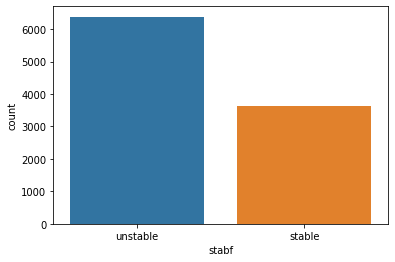

In [26]:
sns.countplot(x="stabf", data=data)
# There are many unstable electrical grids so there is little balance in electricity supply

In [14]:
#num_categories = data.Category.unique().size
#sns.countplot(data=data ,x = 'stabf', hue = 'islong, saturation=1,xerr=7*np.arange(num_categories),edgecolor=(0,0,0),linewidth=2)

In [29]:
#sns.countplot(x="stabf",hue = "p1", data=data,bins = 20)

In [9]:
#columns
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [15]:
#to check target variable therefore showing the difference between classes
data[ 'stabf' ].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [10]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


### Data wrangling
   To clean the data by removing NaN and columns that are unnecessary.

In [8]:
# missing values
data.isnull().sum()# there is no missing values

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [12]:
data.notna()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [47]:
# dropping the column that is not needed(unimportant variables)
Drop_cols = ['stab']
data = data.drop(Drop_cols, axis = 1 )

In [49]:
data.head(3)# new variable

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable


In [8]:
#To get dummy variable for category
pd.get_dummies(data['stabf'],drop_first=True)

,unstable
0,1
1,0
2,1
3,1
4,1
...,...
9995,1
9996,0
9997,0
9998,1


In [65]:
#pd.get_dummies(data['tau4'], drop_first = True)

In [66]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [67]:
data.nunique()

tau1     10000
tau2     10000
tau3     10000
tau4     10000
p1       10000
p2       10000
p3       10000
p4       10000
g1       10000
g2       10000
g3       10000
g4       10000
stabf        2
dtype: int64

### Train and test data

In [8]:
X=data.drop('stabf',axis=1)
y=data['stabf']

In [9]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [14]:
#Encoding the categorical feature. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.stabf = encoder.fit_transform(data.stabf)
#let's preview the encoded feature
data.stabf

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: stabf, Length: 10000, dtype: int64

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_balanced = smote.fit_sample(X_train, y_train)

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1) 

In [26]:
logreg.fit(X_train,y_train)

C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [14]:
predictions=logreg.predict(x_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n      stable       0.85      0.80      0.83       712\n    unstable       0.89      0.92      0.91      1288\n\n    accuracy                           0.88      2000\n   macro avg       0.87      0.86      0.87      2000\nweighted avg       0.88      0.88      0.88      2000\n'

In [41]:
#Confusion Matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
predictions = logreg.predict(x_test)
confusion_matrix(y_test,predictions)#(y_true=y_test, y_pred=new_predictions) #labels=['2A', '3A'])

array([[ 572,  140],
       [ 100, 1188]], dtype=int64)

In [17]:
#Cross-validation and accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, y_test,predictions, cv=5, scoring='f1_macro')
scores 

C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    accept_large_sparse=solver != 'liblinear')
  File "C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 802, in check_X_y
    estimator=es

array([nan, nan, nan, nan, nan])

In [42]:
#Accuracy.py
accuracy = accuracy_score(y_test,predictions)#(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 88.0


In [43]:
#Precision.py
precision = precision_score(y_test,predictions)#(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Precision: {}'.format(round(precision*100), 2))

C:\Users\DIANNE ATTAH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['stable', 'unstable'], dtype='<U8')

In [45]:
#Recall.py
recall = recall_score(y_test,predictions)#(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Recall: {}'.format(round(recall*100), 2))

ValueError: pos_label=1 is not a valid label: array(['stable', 'unstable'], dtype='<U8')

In [ ]:
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
  x_train, x_test = np.array(normalised_train_df)[train_index],  
                    np.array(normalised_train_df)[test_index]
  y_train, y_test  = y_balanced[train_index], y_balanced[test_index]
  model = LogisticRegression().fit(x_train, y_train)
  #save result to list
  f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A'))

In [ ]:
K-Fold Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(normalised_train_df) 
f1_scores = []

In [ ]:
#run for every split
for train_index, test_index in kf.split(normalised_train_df):
  x_train, x_test = normalised_train_df.iloc[train_index],
                    normalised_train_df.iloc[test_index]
  y_train, y_test = y_balanced[train_index],
                    y_balanced[test_index]
  model = LogisticRegression().fit(x_train, y_train)
  #save result to list
  f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), 
                   pos_label='2A')*100)

In [ ]:
Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
Leave One Out Cross Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo, 
                         scoring='f1_macro')
average_score = scores.mean() * 100

In [ ]:
 Tree-Based Methods and The Support Vector Machine
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df, y_balanced)

In [ ]:
print("Accuracy score {}".format(round(accuracy_score(y_test, dec_pred), 3)))
print("Precision score for label 2A %.3f" % (precision_score(y_test, dec_pred, pos_label='2A')))
print("Recall score for label 2A {}".format(round(recall_score(y_test, dec_pred, pos_label='2A'), 3)))
print("F1 score %.3f" % (f1_score(y_test, dec_pred, pos_label='2A')))

In [ ]:
print(classification_report(y_test, dec_pred))

In [ ]:
#xgboost with random forest
from xgboost import XGBRFClassifier
extreme = XGBRFClassifier(random_state=1)
extreme.fit(normalised_train_df, y_balanced)
extreme_pred = extreme.predict(normalised_test_df)

In [ ]:
print(classification_report(y_test, extreme_pred))

In [ ]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree.fit(normalised_train_df, y_balanced)
tree_pred = tree.predict(normalised_test_df)

In [ ]:


n_estimators = [10, 50, 100, 250, 400]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(tree, hyperparameter_grid, random_state=1)
search = clf.fit(normalised_train_df, y_balanced)

In [ ]:
#checking for the best parameter for the model
search.best_params_.values()

In [ ]:
#experimenting with this parameter to test the model's performance
tree_param = ExtraTreesClassifier(n_estimators=100, min_samples_split=9, 
                                 min_samples_leaf=2, max_features='auto', random_state=1)
tree_param.fit(normalised_train_df, y_balanced)
tree_param_pred = tree_param.predict(normalised_test_df)

In [ ]:
#classification report for this hyperparameter tuning
print(classification_report(y_test, tree_param_pred))

In [28]:
# standardize the dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# split into train and test set
X_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=1

SyntaxError: unexpected EOF while parsing (<ipython-input-30-e346cc12dd05>, line 3)

Text(0.5, 1.0, 'top 20 tau1 count')

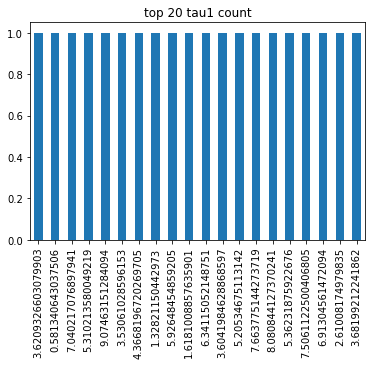

In [27]:
#the most used supplier node
plt.figsize=(20,10)
data[ 'tau1' ].value_counts().nlargest(20).plot(kind='bar')
plt.title('top 20 tau1 count')
#plt.show()